## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore") # Ignore DEAP runtime warnings

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme() # Apply seaborn theme to plots

from deap import tools

from src.constraint import flow_constraint
from src.data import load_dataset
from src.ga import run_petrinas_ga
from src.utils import save_outputs, save_graph

## Configuration

In [2]:
N_PLACES = 12
N_TRANSITIONS = 12

WEIGHT = 0.9
TRANSITIONS = [ 
    "Receiving Request", 
    "First Assessment", 
    "Fraud Check",  
    "Invisible 2", 
    "Invisible 1",
    "Accept", 
    "Decline", 
    "Create Offer", 
    "Contact Customer", 
    "Offer Refused", 
    "Draw Contract", 
    "Send Contract", 
]

# Load in dataset
dataset = load_dataset(filepath="data/traces.txt", transitions=TRANSITIONS)

## Exercise 1

In [3]:
outputs_1 = run_petrinas_ga(
    dataset=dataset,
    n_places=N_PLACES,
    n_transitions=N_TRANSITIONS,
    weight=WEIGHT,
    crossover_ops=[
        {"function": tools.cxTwoPoint},
    ],
    mutation_ops=[
        {"function": tools.mutFlipBit, "indpb": 0.05},
    ],
    selection_ops=[
        {"function": tools.selTournament, "tournsize": 5},
    ],
    crossover_probs=[0.8],
    mutation_probs=[0.2],
    n_individuals=250,
    n_generations=50,
    n_iterations=1,
)

save_outputs(outputs_1, "outputs/exercise-1.json")

Crossover op: cxTwoPoint
Mutation op: mutFlipBit
Selection op: selTournament
Crossover prob: 0.8
Mutation prob: 0.2


100%|██████████| 1/1 [00:04<00:00,  4.98s/it]

Best fitness: 370.6
Average best fitness: 370.6



### Plot fitness at each generation

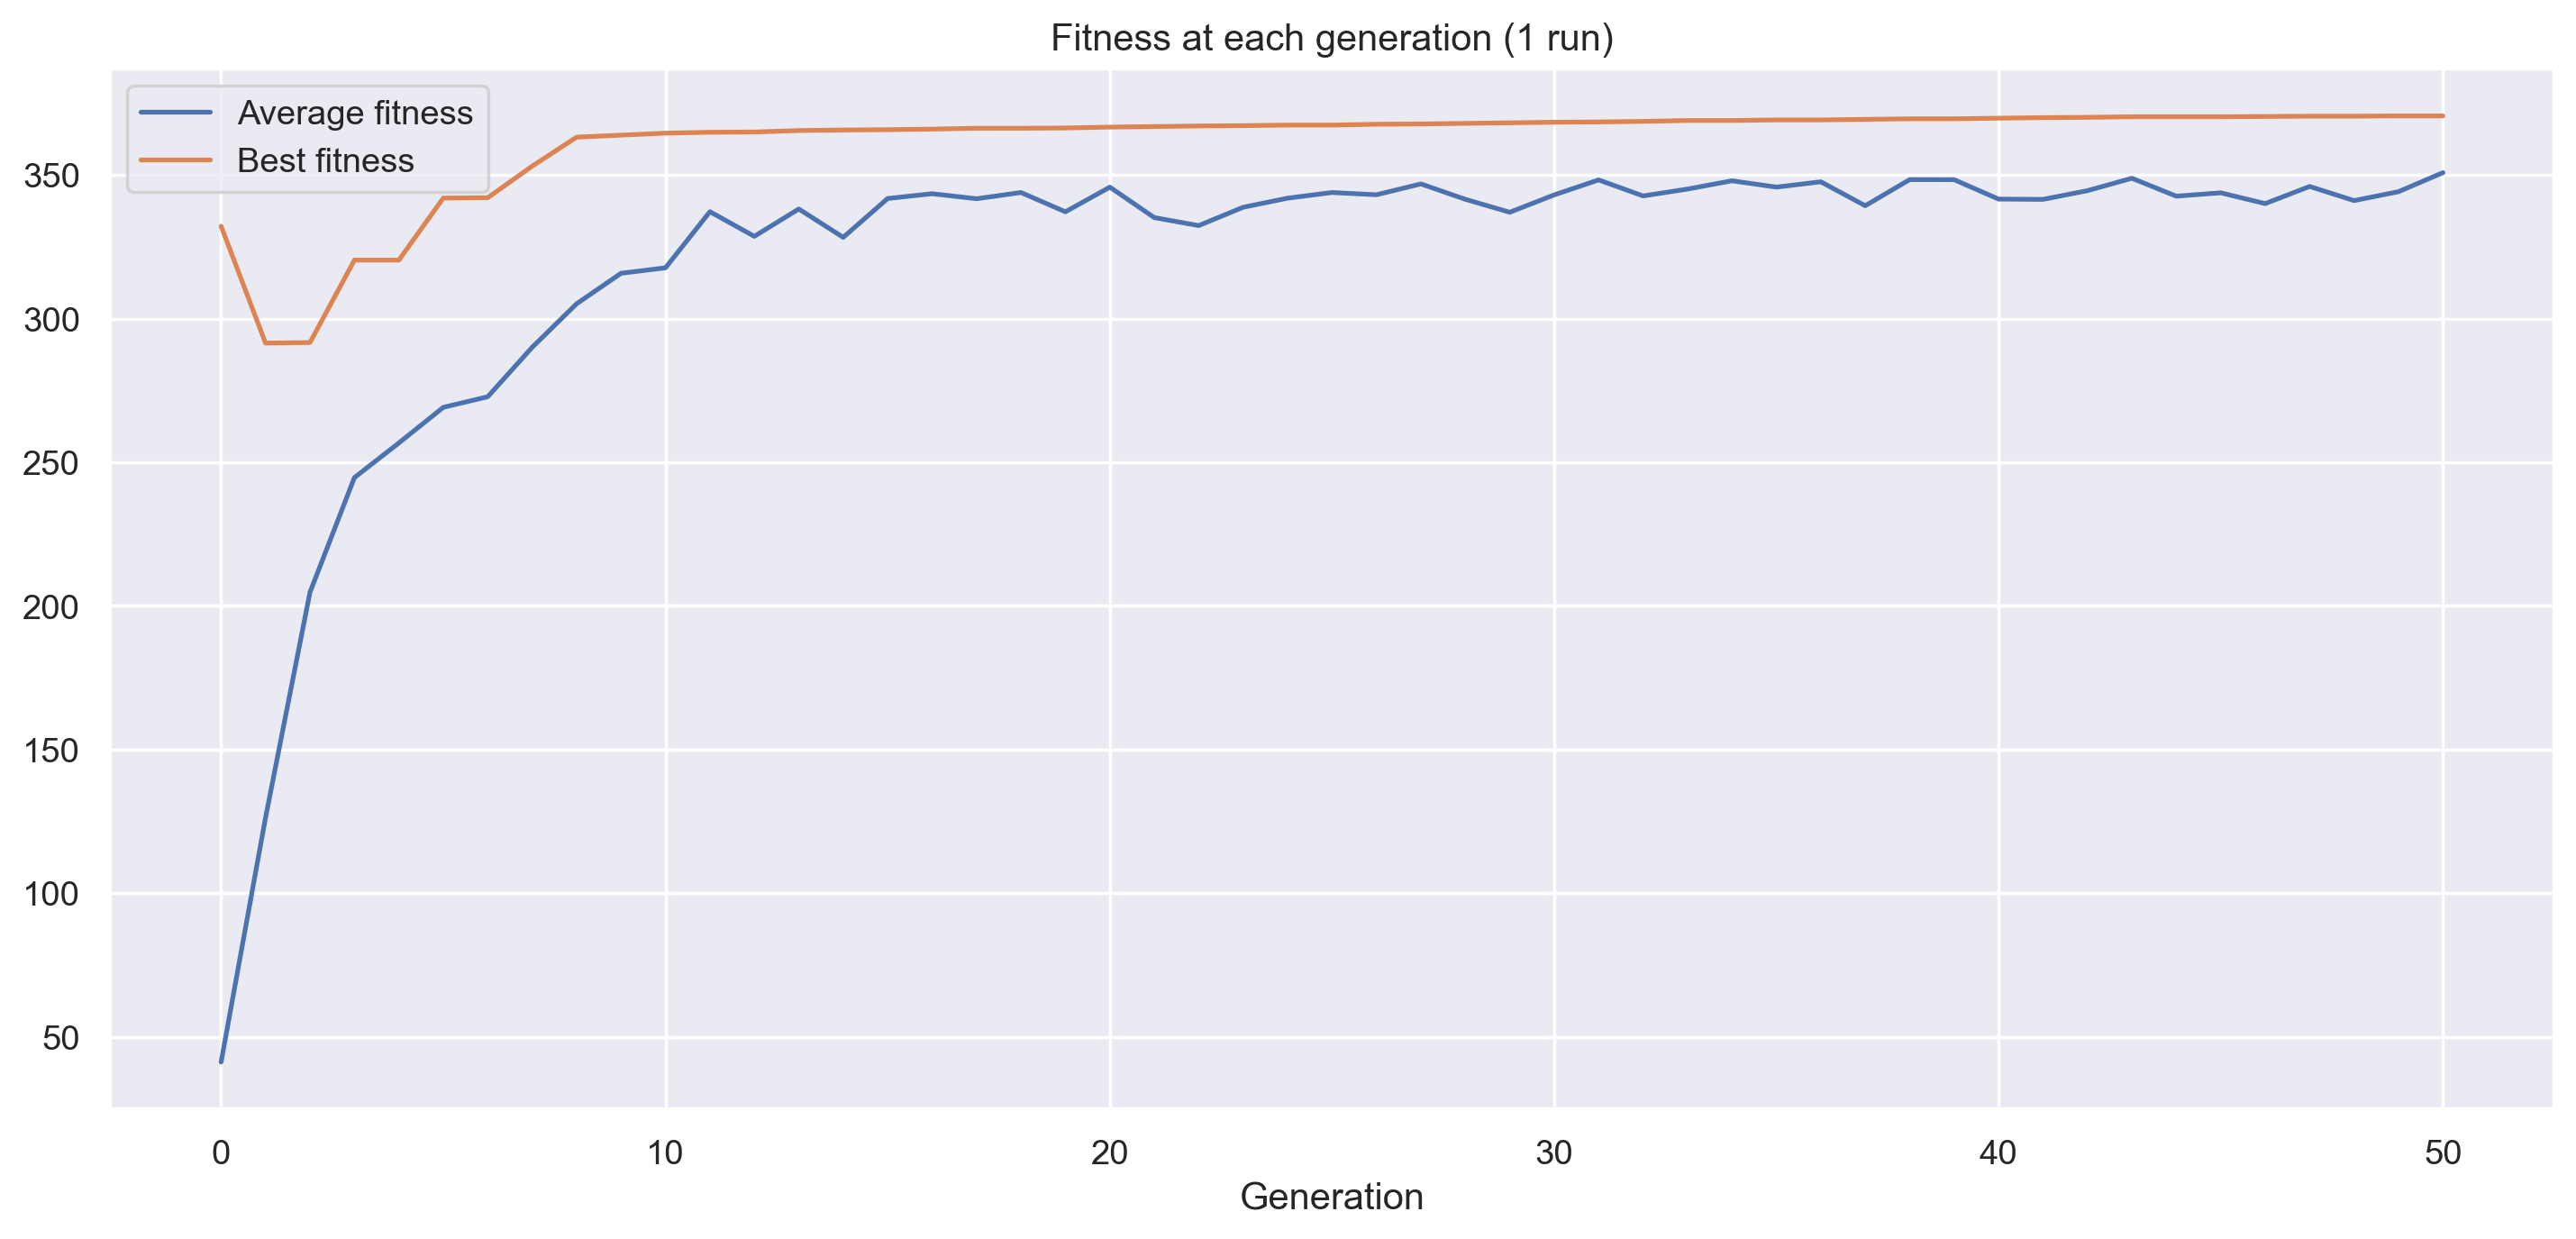

In [4]:
fig, ax = plt.subplots(dpi=250, figsize=(14, 6))
avg_fitness = outputs_1[0]["logbook"].select("avg")
best_fitness = outputs_1[0]["logbook"].select("max")
ax.plot(avg_fitness, label="Average fitness")
ax.plot(best_fitness, label="Best fitness")
ax.set_title("Fitness at each generation (1 run)")
ax.set_xlabel("Generation")
ax.legend()
fig.savefig("plots/exercise-1-fitness.png", bbox_inches="tight")

## Exercise 2

In [5]:
crossover_ops=[
    {"function": tools.cxTwoPoint},
    {"function": tools.cxOrdered},
]
mutation_ops=[
    {"function": tools.mutFlipBit, "indpb": 0.05},
    {"function": tools.mutShuffleIndexes, "indpb": 0.05},
]
selection_ops=[
    {"function": tools.selTournament, "tournsize": 5},
    {"function": tools.selRoulette},
]

outputs_2 = run_petrinas_ga(
    dataset=dataset,
    n_places=N_PLACES,
    n_transitions=N_TRANSITIONS,
    weight=WEIGHT,
    crossover_ops=crossover_ops,
    mutation_ops=mutation_ops,
    selection_ops=selection_ops,
    crossover_probs=[0.8],
    mutation_probs=[0.2],
    n_individuals=250,
    n_generations=50,
    n_iterations=30,
)

save_outputs(outputs_2, "outputs/exercise-2.json")

Crossover op: cxTwoPoint
Mutation op: mutFlipBit
Selection op: selTournament
Crossover prob: 0.8
Mutation prob: 0.2


100%|██████████| 30/30 [02:27<00:00,  4.91s/it]


Best fitness: 371.1
Average best fitness: 368.87333333333333

Crossover op: cxTwoPoint
Mutation op: mutFlipBit
Selection op: selRoulette
Crossover prob: 0.8
Mutation prob: 0.2


100%|██████████| 30/30 [02:15<00:00,  4.51s/it]


Best fitness: 366.2
Average best fitness: 361.5900000000001

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.8
Mutation prob: 0.2


100%|██████████| 30/30 [02:23<00:00,  4.80s/it]


Best fitness: 371.4
Average best fitness: 370.59999999999997

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selRoulette
Crossover prob: 0.8
Mutation prob: 0.2


100%|██████████| 30/30 [02:15<00:00,  4.52s/it]


Best fitness: 365.1
Average best fitness: 363.89

Crossover op: cxOrdered
Mutation op: mutFlipBit
Selection op: selTournament
Crossover prob: 0.8
Mutation prob: 0.2


100%|██████████| 30/30 [02:36<00:00,  5.20s/it]


Best fitness: 371.3
Average best fitness: 366.72

Crossover op: cxOrdered
Mutation op: mutFlipBit
Selection op: selRoulette
Crossover prob: 0.8
Mutation prob: 0.2


100%|██████████| 30/30 [02:33<00:00,  5.10s/it]


Best fitness: 366.1
Average best fitness: 360.12000000000006

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.8
Mutation prob: 0.2


100%|██████████| 30/30 [02:33<00:00,  5.11s/it]


Best fitness: 371.4
Average best fitness: 370.5833333333334

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selRoulette
Crossover prob: 0.8
Mutation prob: 0.2


100%|██████████| 30/30 [02:34<00:00,  5.14s/it]


Best fitness: 365.1
Average best fitness: 363.87000000000006



### Make table of performance of each combination

In [6]:
print(
    "CROSSOVER".ljust(10),
    "MUTATION".ljust(17),
    "SELECTION".ljust(13),
    "ABF".ljust(6),
    "TIME".ljust(7),
)

for crossover_op in crossover_ops:
    for mutation_op in mutation_ops:
        for selection_op in selection_ops:
            runs = [
                output for output in outputs_2
                if output["crossover_op"] == crossover_op
                and output["mutation_op"] == mutation_op
                and output["selection_op"] == selection_op
            ]

            abf = np.mean([run["best_fitness"] for run in runs])
            running_time = np.mean([run["running_time"] for run in runs])

            print(
                crossover_op["function"].__name__.ljust(10),
                mutation_op["function"].__name__.ljust(17),
                selection_op["function"].__name__.ljust(13),
                f"{abf:.5}".ljust(6),
                f"{running_time:.5}".ljust(7),
            )

CROSSOVER  MUTATION          SELECTION     ABF    TIME   
cxTwoPoint mutFlipBit        selTournament 368.87 4.8749 
cxTwoPoint mutFlipBit        selRoulette   361.59 4.4756 
cxTwoPoint mutShuffleIndexes selTournament 370.6  4.7662 
cxTwoPoint mutShuffleIndexes selRoulette   363.89 4.4911 
cxOrdered  mutFlipBit        selTournament 366.72 5.1725 
cxOrdered  mutFlipBit        selRoulette   360.12 5.07   
cxOrdered  mutShuffleIndexes selTournament 370.58 5.0758 
cxOrdered  mutShuffleIndexes selRoulette   363.87 5.1123 


### Make plot of ABF of each combination

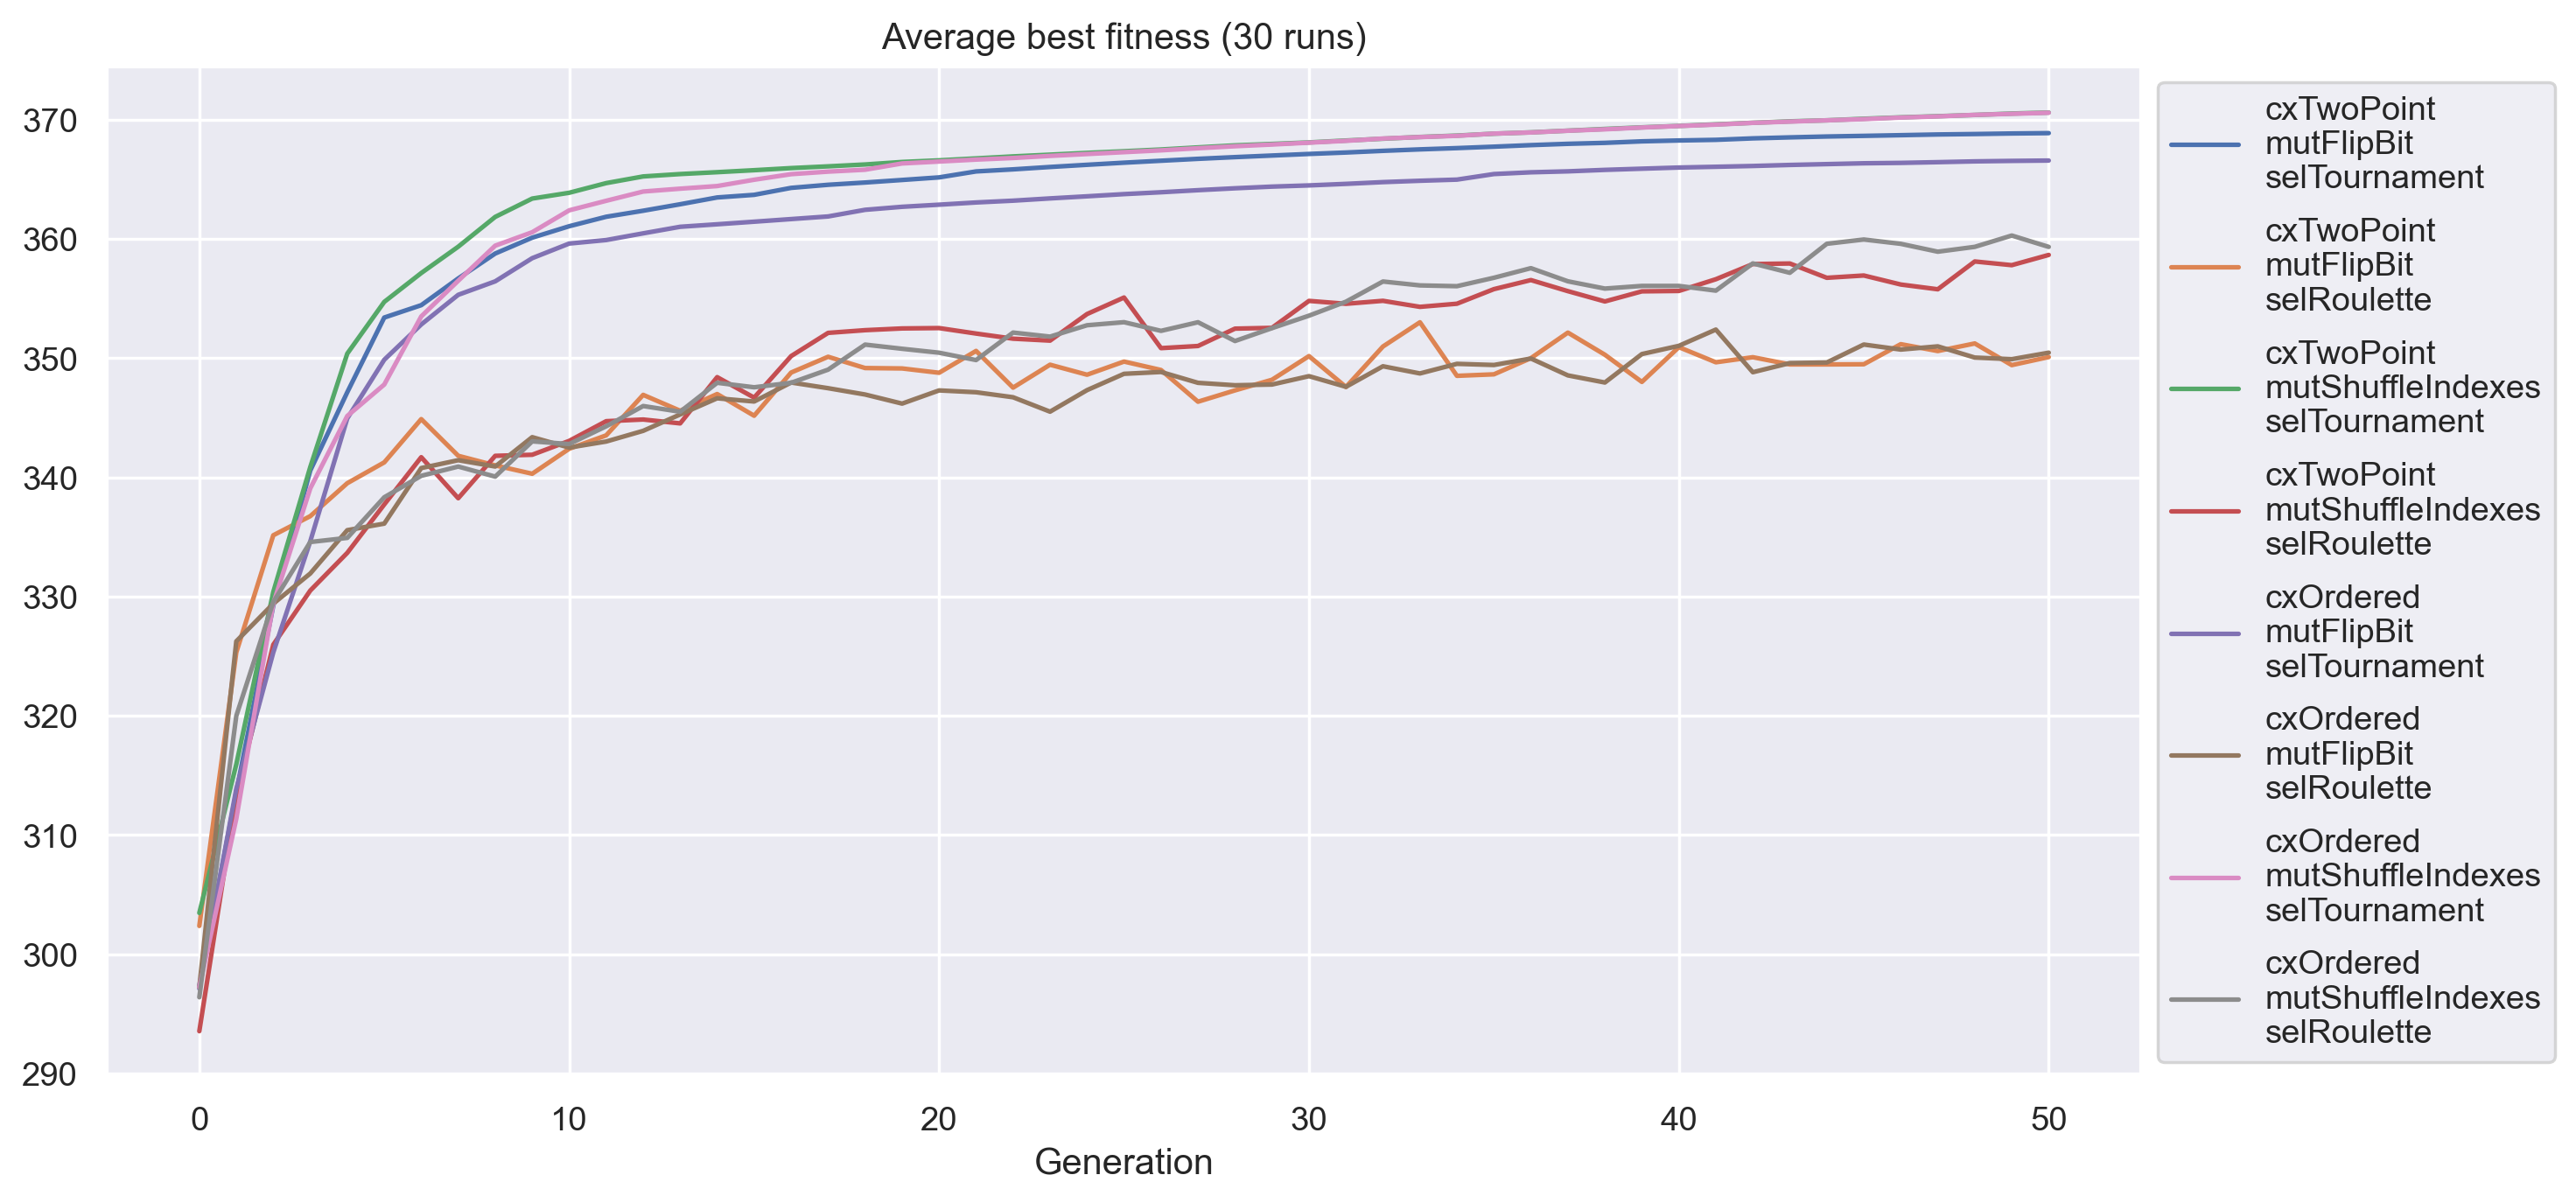

In [7]:
fig, ax = plt.subplots(dpi=250, figsize=(12, 6))
ax.set_title("Average best fitness (30 runs)")
ax.set_xlabel("Generation")

for crossover_op in crossover_ops:
    for mutation_op in mutation_ops:
        for selection_op in selection_ops:
            runs = [
                output for output in outputs_2
                if output["crossover_op"] == crossover_op
                and output["mutation_op"] == mutation_op
                and output["selection_op"] == selection_op
            ]

            best_fitness_runs = np.array([run["logbook"].select("max") for run in runs])
            abf = best_fitness_runs.mean(axis=0)

            ax.plot(
                abf, 
                label=f"{crossover_op['function'].__name__}\n{mutation_op['function'].__name__}\n{selection_op['function'].__name__}"
            )

ax.legend(loc="center left", ncols=1, bbox_to_anchor=(1, 0.5), labelspacing=0.7)
fig.savefig("plots/exercise-2-abf.png", bbox_inches="tight")

### Make boxplot of best fitness distribution of each combination

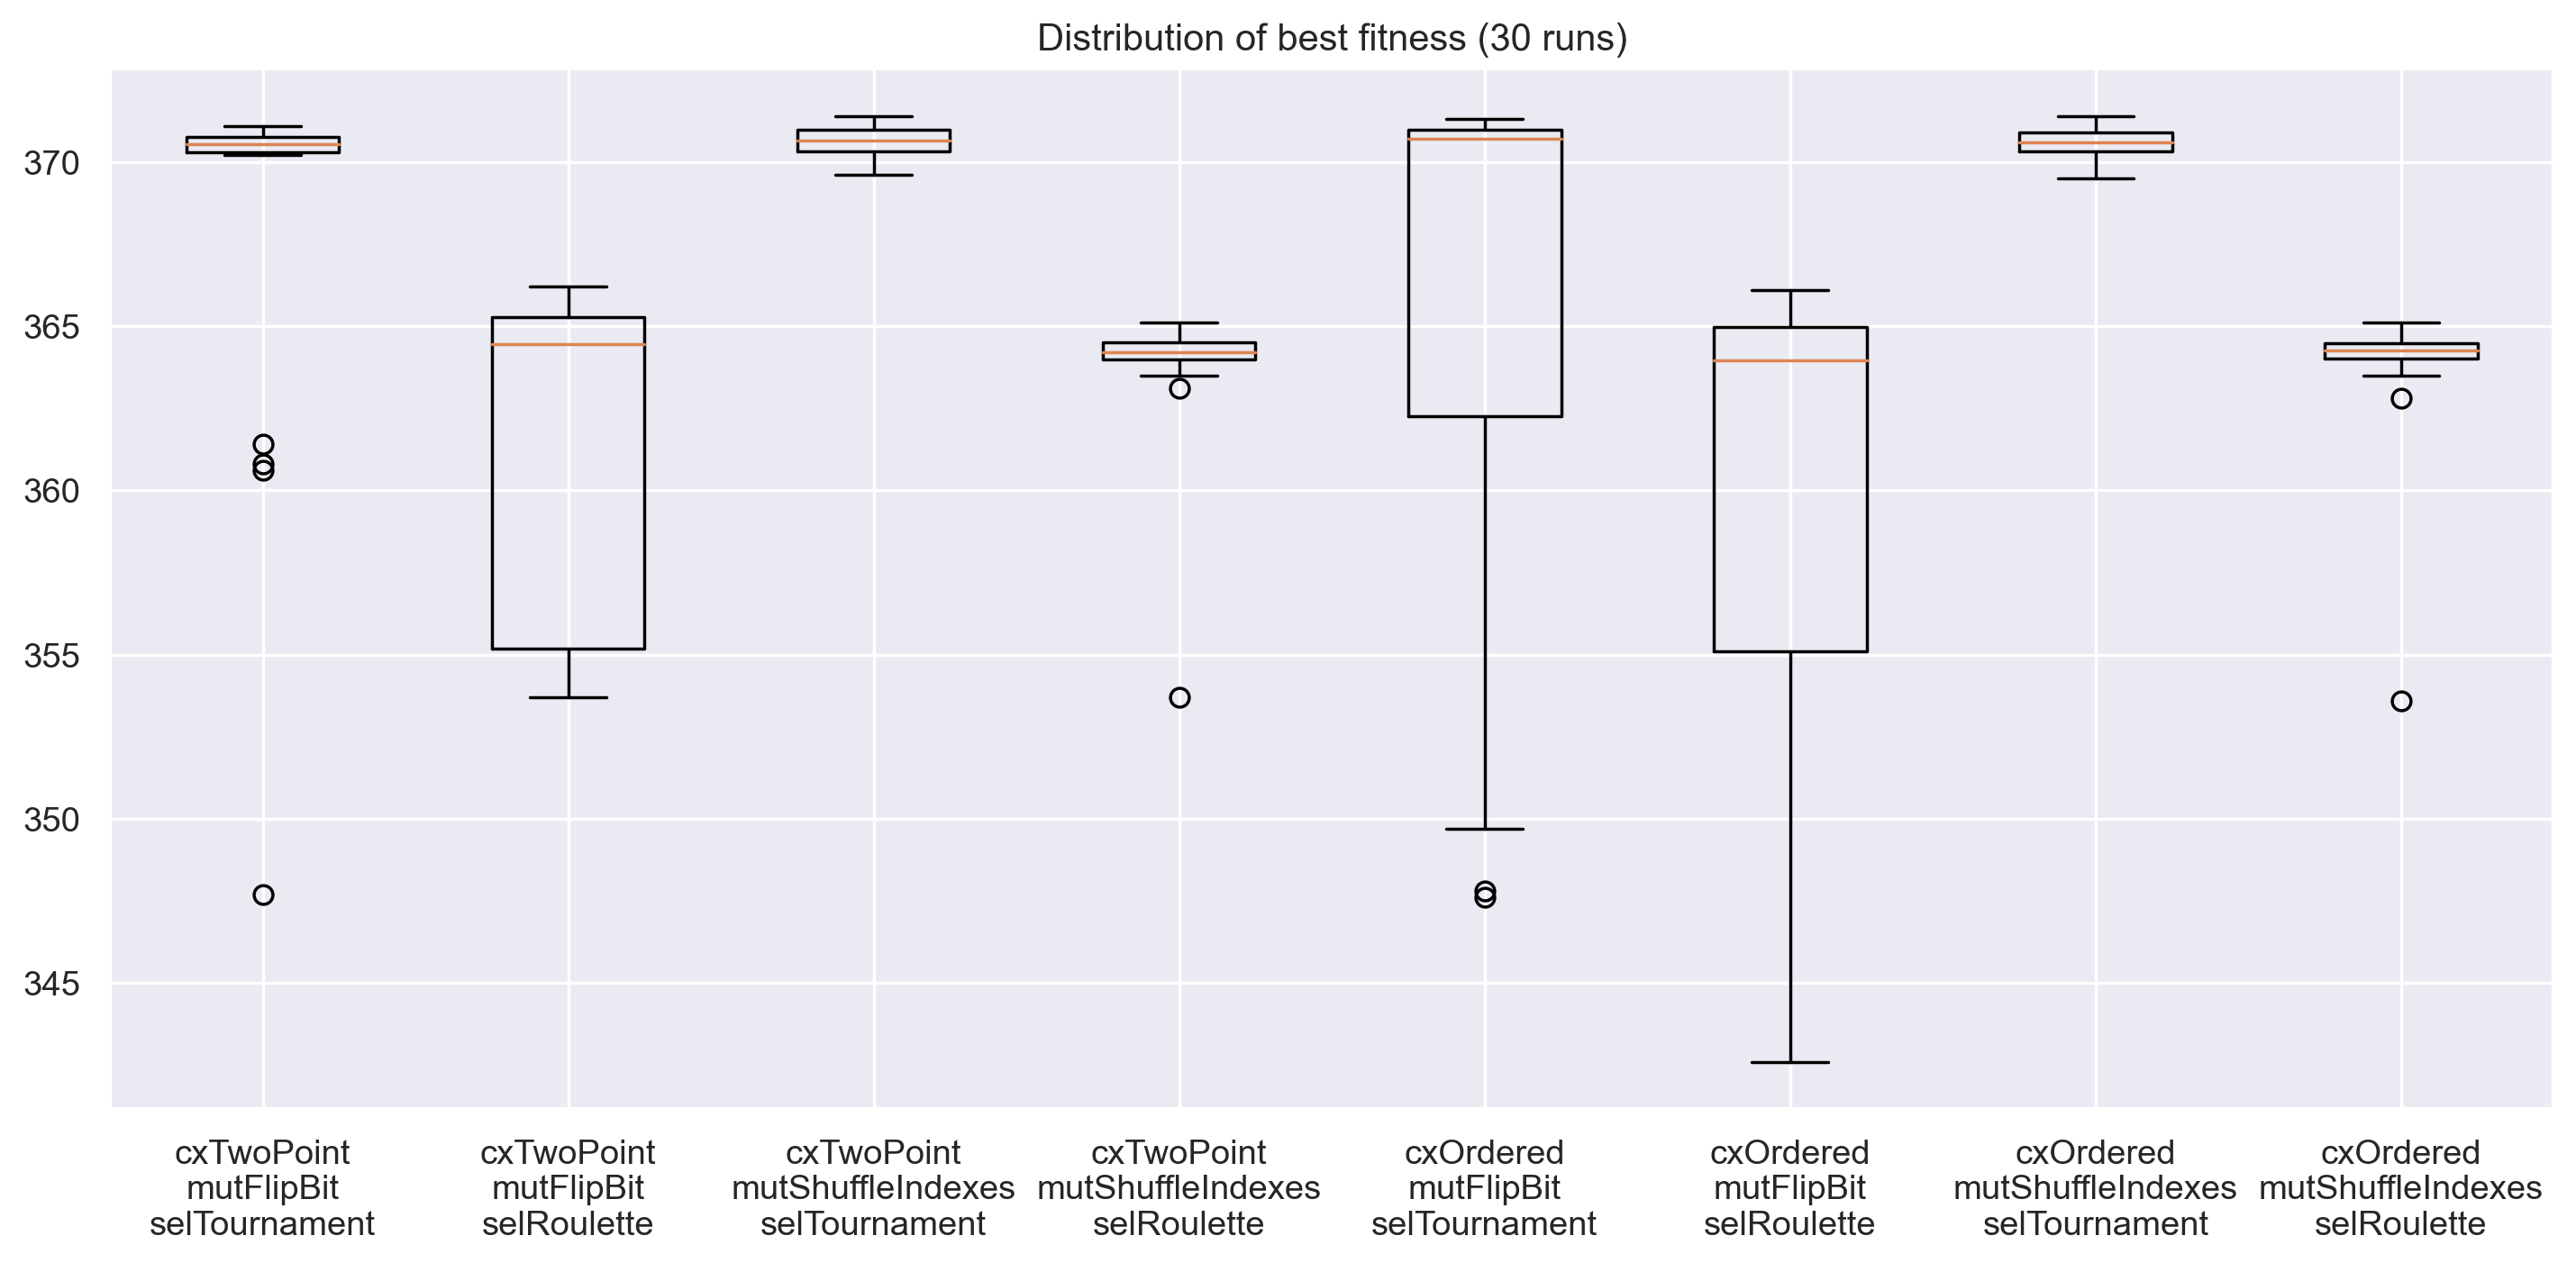

In [8]:
fig, ax = plt.subplots(dpi=250, figsize=(14, 6))
ax.set_title("Distribution of best fitness (30 runs)")

data = []
xticklabels = []

for crossover_op in crossover_ops:
    for mutation_op in mutation_ops:
        for selection_op in selection_ops:
            runs = [
                output for output in outputs_2
                if output["crossover_op"] == crossover_op
                and output["mutation_op"] == mutation_op
                and output["selection_op"] == selection_op
            ]

            data.append([run["best_fitness"] for run in runs])
            xticklabels.append(
                f"{crossover_op['function'].__name__}\n"
                f"{mutation_op['function'].__name__}\n"
                f"{selection_op['function'].__name__}"
            )

ax.boxplot(data)
ax.set_xticklabels(xticklabels)
fig.savefig("plots/exercise-2-boxplot.png", bbox_inches="tight")

## Exercise 3

In [9]:
crossover_probs = [0.2, 0.4, 0.6, 0.8]
mutation_probs = [0.2, 0.4, 0.6, 0.8]
outputs_3 = run_petrinas_ga(
    dataset=dataset,
    n_places=N_PLACES,
    n_transitions=N_TRANSITIONS,
    weight=WEIGHT,
    crossover_ops=[
        {"function": tools.cxTwoPoint},
    ],
    mutation_ops=[
        {"function": tools.mutShuffleIndexes, "indpb": 0.05},
    ],
    selection_ops=[
        {"function": tools.selTournament, "tournsize": 5},
    ],
    crossover_probs=crossover_probs,
    mutation_probs=mutation_probs,
    n_individuals=250,
    n_generations=50,
    n_iterations=30,
)

save_outputs(outputs_3, "outputs/exercise-3.json")

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.2
Mutation prob: 0.2


100%|██████████| 30/30 [01:14<00:00,  2.49s/it]


Best fitness: 368.6
Average best fitness: 367.7433333333334

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.2
Mutation prob: 0.4


100%|██████████| 30/30 [01:52<00:00,  3.76s/it]


Best fitness: 369.7
Average best fitness: 368.4966666666666

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.2
Mutation prob: 0.6


100%|██████████| 30/30 [01:48<00:00,  3.60s/it]


Best fitness: 369.4
Average best fitness: 368.6966666666667

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.2
Mutation prob: 0.8


100%|██████████| 30/30 [02:05<00:00,  4.19s/it]


Best fitness: 369.2
Average best fitness: 368.08

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.4
Mutation prob: 0.2


100%|██████████| 30/30 [01:38<00:00,  3.28s/it]


Best fitness: 369.8
Average best fitness: 368.92333333333323

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.4
Mutation prob: 0.4


100%|██████████| 30/30 [01:48<00:00,  3.63s/it]


Best fitness: 370.4
Average best fitness: 369.4433333333334

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.4
Mutation prob: 0.6


100%|██████████| 30/30 [01:58<00:00,  3.96s/it]


Best fitness: 371.0
Average best fitness: 369.66999999999996

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.4
Mutation prob: 0.8


100%|██████████| 30/30 [02:07<00:00,  4.26s/it]


Best fitness: 370.4
Average best fitness: 368.9800000000001

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.6
Mutation prob: 0.2


100%|██████████| 30/30 [02:00<00:00,  4.03s/it]


Best fitness: 370.6
Average best fitness: 369.8199999999999

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.6
Mutation prob: 0.4


100%|██████████| 30/30 [02:04<00:00,  4.16s/it]


Best fitness: 371.2
Average best fitness: 370.52666666666664

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.6
Mutation prob: 0.6


100%|██████████| 30/30 [02:10<00:00,  4.34s/it]


Best fitness: 371.3
Average best fitness: 370.48333333333335

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.6
Mutation prob: 0.8


100%|██████████| 30/30 [02:12<00:00,  4.43s/it]


Best fitness: 370.7
Average best fitness: 369.41666666666663

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.8
Mutation prob: 0.2


100%|██████████| 30/30 [02:20<00:00,  4.68s/it]


Best fitness: 371.4
Average best fitness: 370.6333333333333

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.8
Mutation prob: 0.4


100%|██████████| 30/30 [02:21<00:00,  4.71s/it]


Best fitness: 371.6
Average best fitness: 370.9799999999999

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.8
Mutation prob: 0.6


100%|██████████| 30/30 [02:19<00:00,  4.65s/it]


Best fitness: 371.7
Average best fitness: 370.75

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.8
Mutation prob: 0.8


100%|██████████| 30/30 [02:20<00:00,  4.69s/it]


Best fitness: 370.4
Average best fitness: 369.6533333333334



### Make table of performance of each combination

In [10]:
print(
    "P_C".ljust(4),
    "P_M".ljust(4),
    "ABF".ljust(6),
    "TIME".ljust(7),
)

for crossover_prob in crossover_probs:
    for mutation_prob in mutation_probs:
        runs = [
            output for output in outputs_3
            if output["crossover_prob"] == crossover_prob
            and output["mutation_prob"] == mutation_prob
        ]

        abf = np.mean([run["best_fitness"] for run in runs])
        running_time = np.mean([run["running_time"] for run in runs])

        print(
            str(crossover_prob).ljust(4),
            str(mutation_prob).ljust(4),
            f"{abf:.5}".ljust(6),
            f"{running_time:.5}".ljust(7),
        )

P_C  P_M  ABF    TIME   
0.2  0.2  367.74 2.4616 
0.2  0.4  368.5  3.7176 
0.2  0.6  368.7  3.5718 
0.2  0.8  368.08 4.1628 
0.4  0.2  368.92 3.2519 
0.4  0.4  369.44 3.5968 
0.4  0.6  369.67 3.9329 
0.4  0.8  368.98 4.229  
0.6  0.2  369.82 3.9957 
0.6  0.4  370.53 4.133  
0.6  0.6  370.48 4.3066 
0.6  0.8  369.42 4.4013 
0.8  0.2  370.63 4.6516 
0.8  0.4  370.98 4.6753 
0.8  0.6  370.75 4.6147 
0.8  0.8  369.65 4.6535 


### Make plot of ABF of each combination

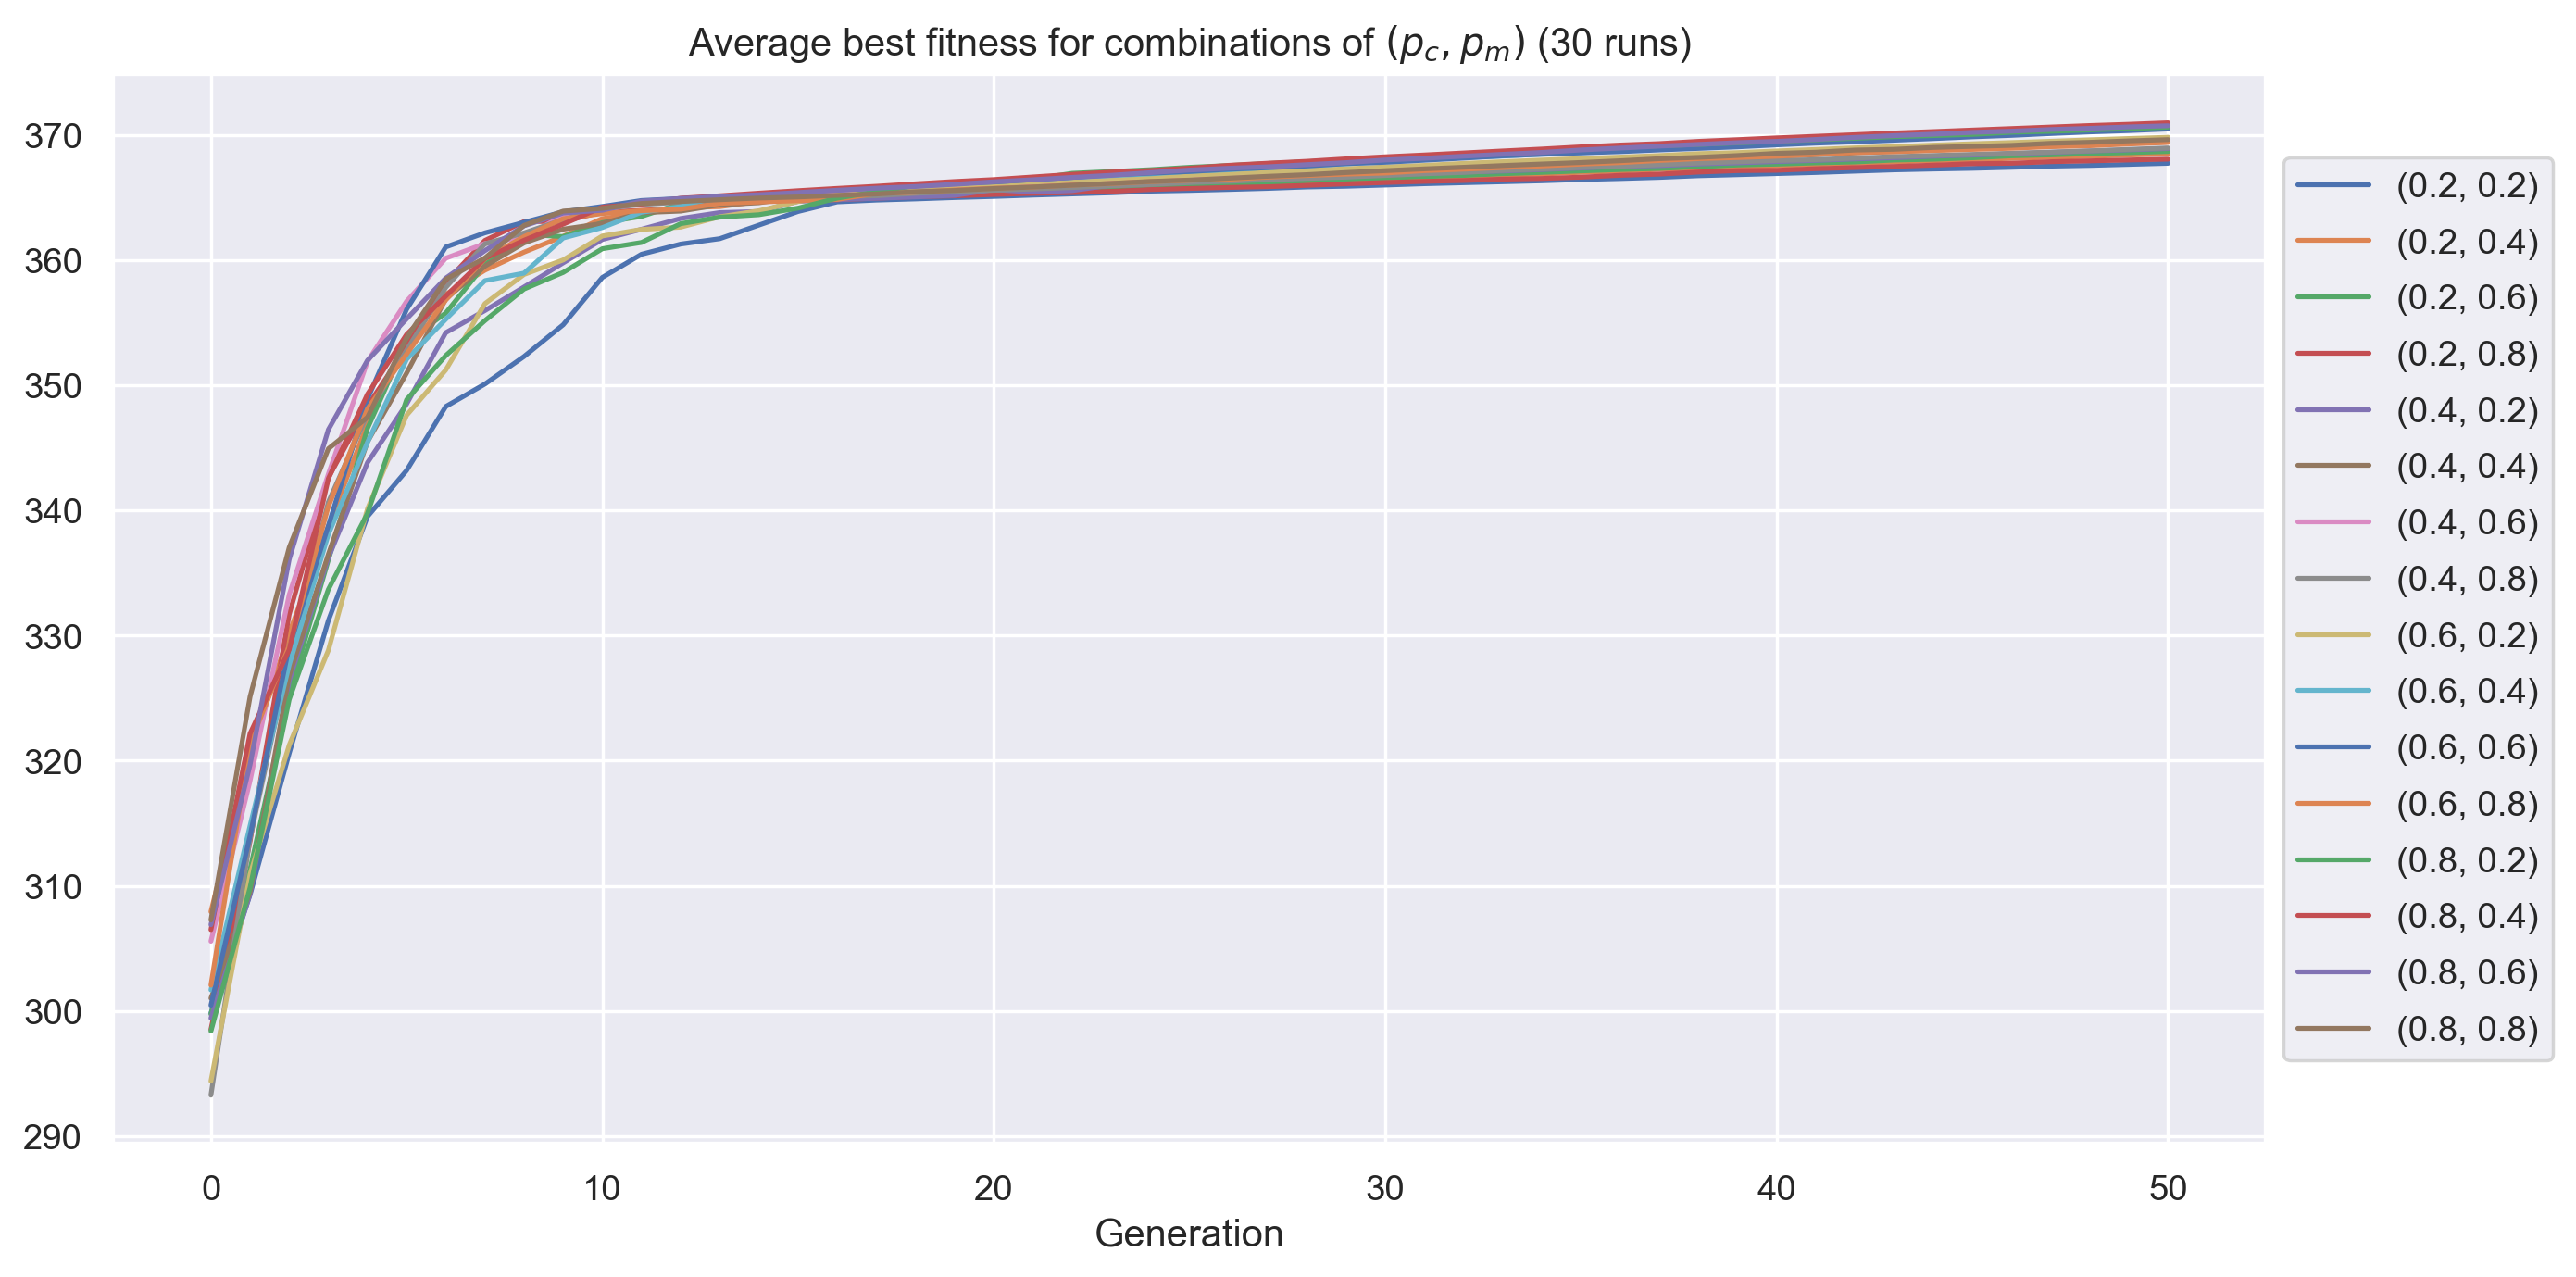

In [11]:
fig, ax = plt.subplots(dpi=250, figsize=(12, 6))
ax.set_title("Average best fitness for combinations of $(p_c, p_m)$ (30 runs)")
ax.set_xlabel("Generation")

for crossover_prob in crossover_probs:
    for mutation_prob in mutation_probs:
        runs = [
            output for output in outputs_3
            if output["crossover_prob"] == crossover_prob
            and output["mutation_prob"] == mutation_prob
        ]

        best_fitness_runs = np.array([run["logbook"].select("max") for run in runs])
        abf = best_fitness_runs.mean(axis=0)

        ax.plot(abf, label=f"({crossover_prob}, {mutation_prob})")

ax.legend(loc="center left", ncols=1, bbox_to_anchor=(1, 0.5), labelspacing=0.7)
fig.savefig("plots/exercise-3-abf.png", bbox_inches="tight")

### Make boxplot of best fitness value of each combination

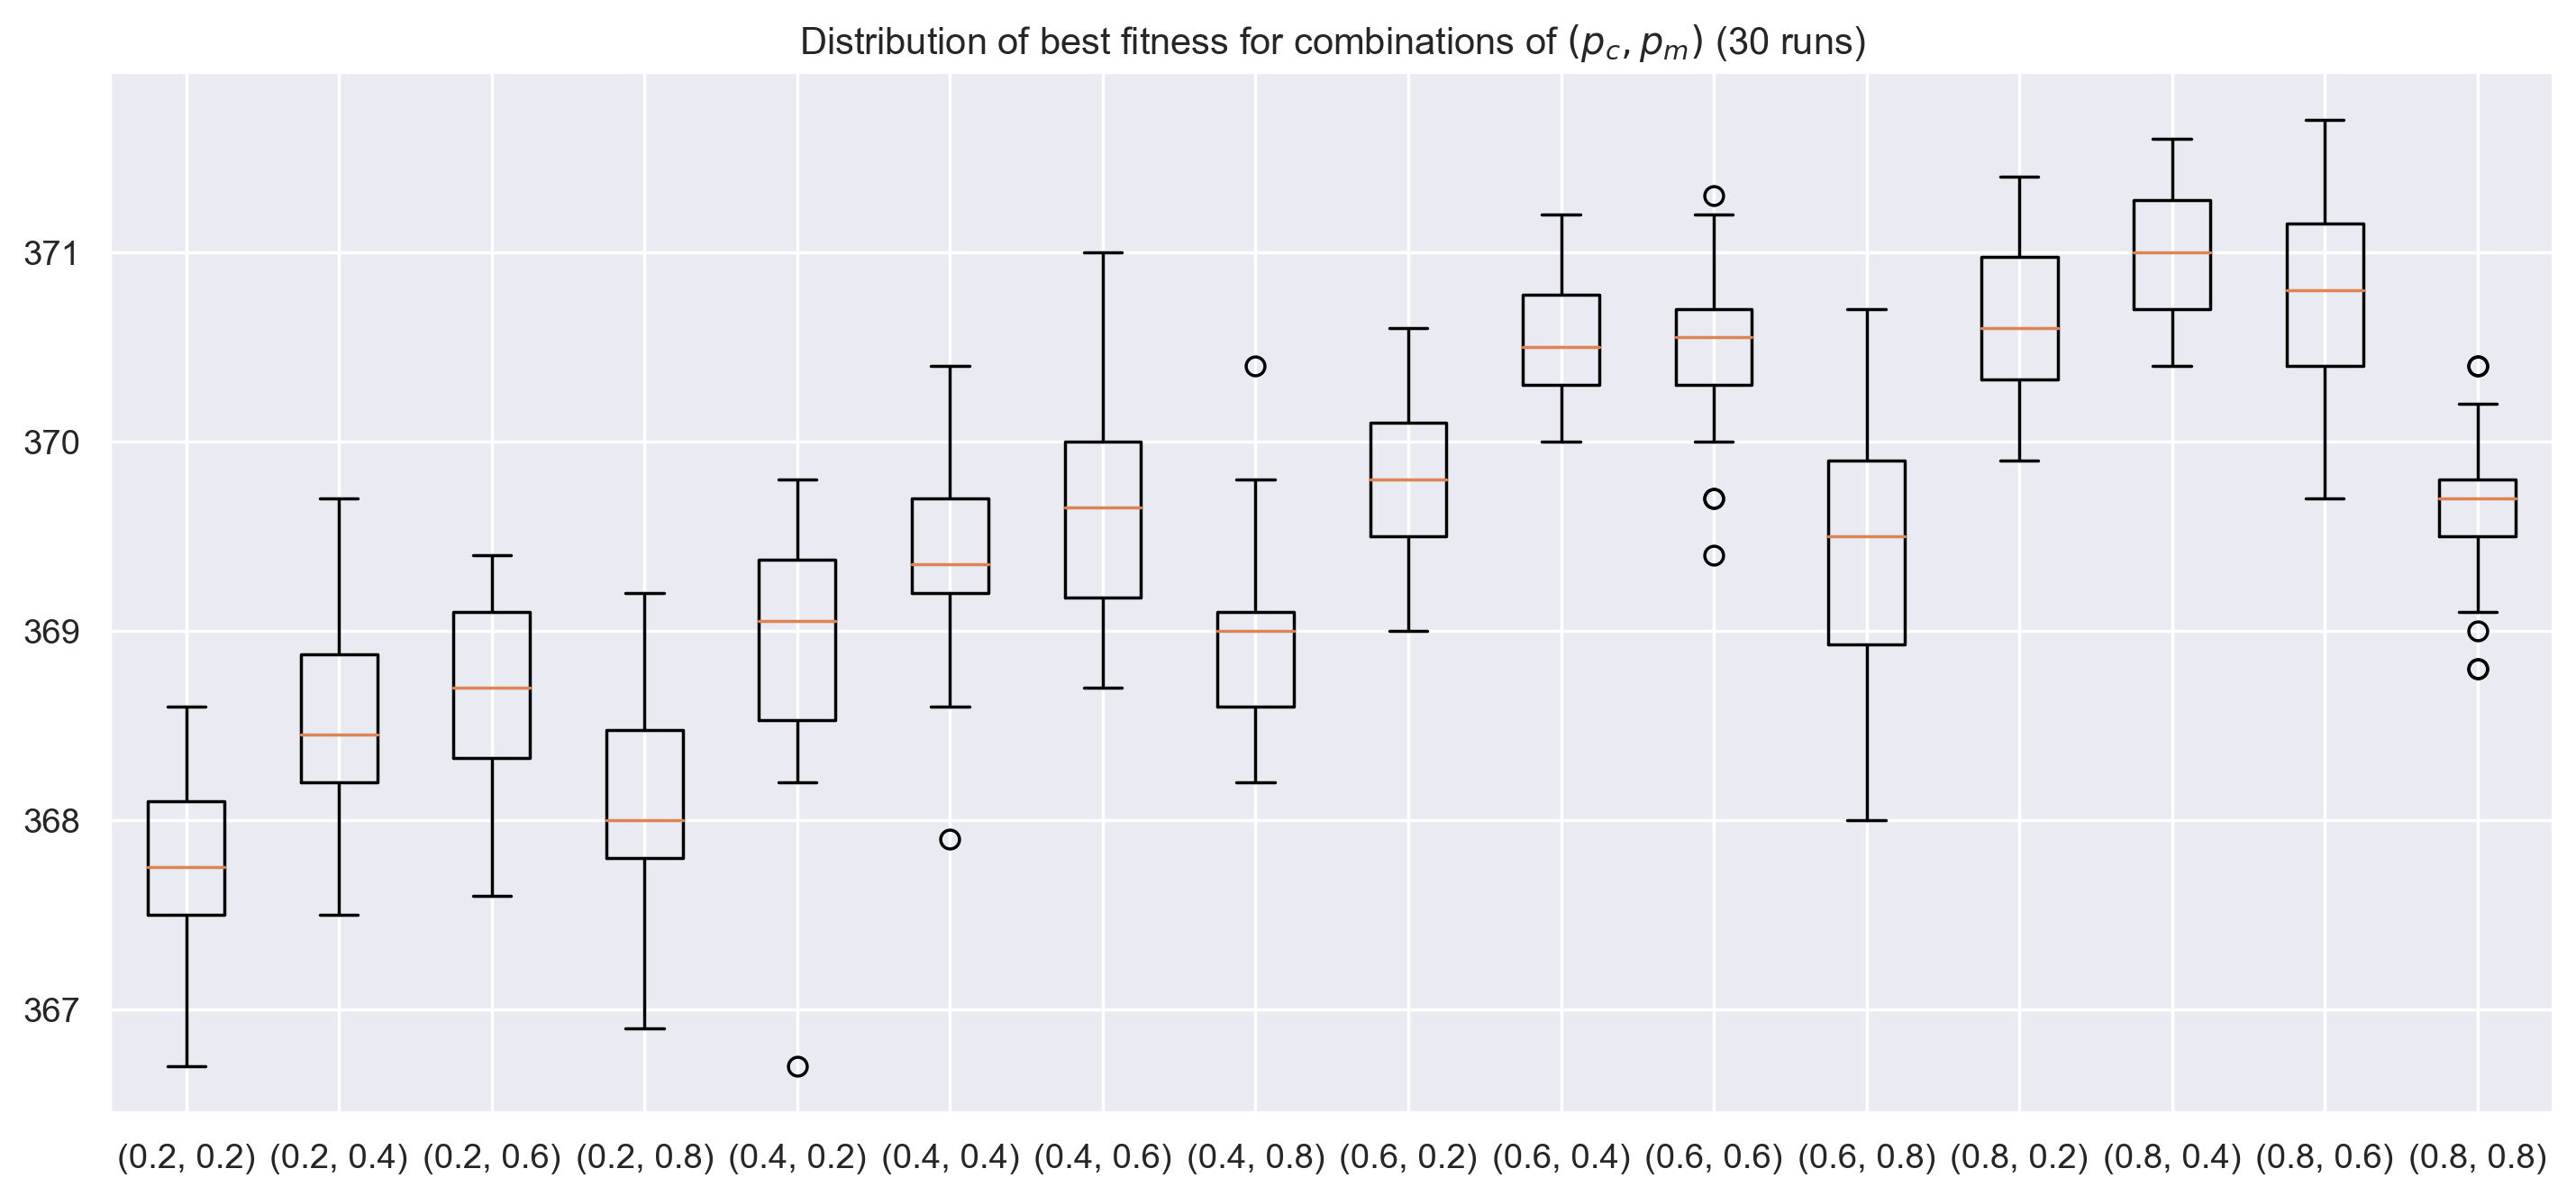

In [12]:
fig, ax = plt.subplots(dpi=250, figsize=(14, 6))
ax.set_title("Distribution of best fitness for combinations of $(p_c, p_m)$ (30 runs)")

data = []
xticklabels = []

for crossover_prob in crossover_probs:
    for mutation_prob in mutation_probs:
            runs = [
                output for output in outputs_3
                if output["crossover_prob"] == crossover_prob
                and output["mutation_prob"] == mutation_prob
            ]

            data.append([run["best_fitness"] for run in runs])
            xticklabels.append(f"({crossover_prob}, {mutation_prob})")

ax.boxplot(data)
ax.set_xticklabels(xticklabels)
fig.savefig("plots/exercise-3-boxplot.png", bbox_inches="tight")

### Manually inspect matrix

In [4]:
best_run_index = np.argmax([output["best_fitness"] for output in outputs_3])
best_individual = outputs_3[best_run_index]["halloffame"][0]

np.array(outputs_3[best_run_index]["halloffame"][0]).reshape(N_PLACES, N_TRANSITIONS)

array([[-1,  1, -1,  0,  0,  0,  0,  0,  0,  0,  1, -1],
       [ 0,  0,  0,  0,  0,  1,  0, -1,  0,  0,  0,  0],
       [ 1, -1,  1,  0,  0, -1, -1,  1, -1,  0, -1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, -1, -1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

### Plot graph

In [5]:
save_graph(
    individual=best_individual,
    n_places=N_PLACES,
    n_transitions=N_TRANSITIONS,
    transitions=TRANSITIONS,
    output_file="plots/exercise-3-network.pdf"
)

## Exercise 4 and 5

In [36]:
outputs_4 = run_petrinas_ga(
    dataset=dataset,
    n_places=N_PLACES,
    n_transitions=N_TRANSITIONS,
    weight=WEIGHT,
    crossover_ops=[
        {"function": tools.cxTwoPoint},
    ],
    mutation_ops=[
        {"function": tools.mutShuffleIndexes, "indpb": 0.05},
    ],
    selection_ops=[
        {"function": tools.selTournament, "tournsize": 5},
    ],
    crossover_probs=[0.8],
    mutation_probs=[0.4],
    n_individuals=250,
    n_generations=50,
    n_iterations=30,
    crossover_decorator=flow_constraint(
        n_places=N_PLACES,
        n_transitions=N_TRANSITIONS,
        max_nonzero=2,
    ),
    mutation_decorator=flow_constraint(
        n_places=N_PLACES,
        n_transitions=N_TRANSITIONS,
        max_nonzero=2,
    ),
)
save_outputs(outputs_4, "outputs/exercise-4.json")

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.8
Mutation prob: 0.4


100%|██████████| 30/30 [02:30<00:00,  5.03s/it]

Best fitness: 351.40000000000003
Average best fitness: 303.1166666666667



### Manually inspect matrix

In [39]:
best_run_index = np.argmax([output["best_fitness"] for output in outputs_4])
best_individual = outputs_4[best_run_index]["halloffame"][0]

np.array(outputs_4[best_run_index]["halloffame"][0]).reshape(N_PLACES, N_TRANSITIONS)

array([[-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, -1, -1,  1, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, -1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, -1,  0,  0,  0,  0,  0,  1,  0, -1,  0]])

### Plot graph

In [40]:
save_graph(
    individual=best_individual,
    n_places=N_PLACES,
    n_transitions=N_TRANSITIONS,
    transitions=TRANSITIONS,
    output_file="plots/exercise-5-network.pdf"
)